# RFM Analysis

RFM (Recency, Frequency, Monetary) analysis is a data-driven marketing technique used by businesses to segment and understand their customer base. The acronym RFM stands for Recency, Frequency, and Monetary, which are three key factors that provide insights into customer behavior and preferences.


### Purpose of RFM Analysis

The primary goals and purposes of RFM analysis are as follows:

- **Customer Segmentation:** RFM analysis allows businesses to categorize their customer base into different segments based on their purchasing behavior. These segments help in targeting and tailoring marketing efforts more effectively.

- **Identifying High-Value Customers:** By analyzing RFM scores, businesses can identify their most valuable customers—those who have made recent, frequent, and high-value purchases. These customers are often the most profitable and deserve special attention.

- **Customer Retention:** RFM analysis helps in understanding and retaining existing customers. By identifying customers who may be at risk of attrition (low recency, frequency, or monetary value), businesses can implement strategies to keep them engaged.

- **Personalization:** Segmented customer groups generated through RFM analysis enable businesses to create personalized marketing campaigns, product recommendations, and offers that are more likely to resonate with each group's preferences.

- **Optimizing Marketing Strategies:** RFM analysis provides insights into which marketing strategies and channels are most effective for different customer segments. This optimization can lead to improved marketing ROI.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Sales Transaction v.4a.csv')

In [3]:
df

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom
...,...,...,...,...,...,...,...,...
536345,C536548,12/1/2018,22168,Organiser Wood Antique White,18.96,-2,12472.0,Germany
536346,C536548,12/1/2018,21218,Red Spotty Biscuit Tin,14.09,-3,12472.0,Germany
536347,C536548,12/1/2018,20957,Porcelain Hanging Bell Small,11.74,-1,12472.0,Germany
536348,C536548,12/1/2018,22580,Advent Calendar Gingham Sack,16.35,-4,12472.0,Germany


In [4]:
df.describe()

,Price,Quantity,CustomerNo
count,536350.000000,536350.000000,536295.000000
mean,12.662182,9.919347,15227.893178
std,8.490450,216.662300,1716.582932
min,5.130000,-80995.000000,12004.000000
25%,10.990000,1.000000,13807.000000
50%,11.940000,3.000000,15152.000000
75%,14.090000,10.000000,16729.000000
max,660.620000,80995.000000,18287.000000


In [5]:
df['CustomerNo'].nunique()

4738

In [6]:
df['TransactionNo'].nunique()

23204

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536350 non-null  object 
 1   Date           536350 non-null  object 
 2   ProductNo      536350 non-null  object 
 3   ProductName    536350 non-null  object 
 4   Price          536350 non-null  float64
 5   Quantity       536350 non-null  int64  
 6   CustomerNo     536295 non-null  float64
 7   Country        536350 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.7+ MB


In [8]:
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
najmniejsza_data = df['Date'].min()
print(f'Smallest date: {najmniejsza_data}')

Smallest date: 2018-12-01 00:00:00


In [10]:
najwieksza_data = df['Date'].max()
print(f'Largest date: {najwieksza_data}')

Largest date: 2019-12-09 00:00:00


In [11]:
df = df.sort_values(by=['CustomerNo', 'Date'])

In [12]:
df

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
368756,551004,2019-04-26,21843,Red Retrospot Cake Stand,31.56,1,12004.0,United Kingdom
368757,551004,2019-04-26,22501,Picnic Basket Wicker Large,31.56,1,12004.0,United Kingdom
368774,551004,2019-04-26,22171,3 Hook Photo Shelf Antique White,27.30,1,12004.0,United Kingdom
368783,551004,2019-04-26,21257,Victorian Sewing Box Medium,26.43,1,12004.0,United Kingdom
368932,551004,2019-04-26,22966,Gingerbread Man Cookie Cutter,12.77,1,12004.0,United Kingdom
...,...,...,...,...,...,...,...,...
117263,C573180,2019-10-28,23048,Set Of 10 Lanterns Fairy Light Star,14.50,-1,NaN,United Kingdom
102671,C574288,2019-11-03,22178,Victorian Glass Hanging T-Light,25.37,-1,NaN,United Kingdom
90098,C575153,2019-11-08,22947,Wooden Advent Calendar Red,44.25,-1,NaN,United Kingdom
6511,C581406,2019-12-08,46000M,Polyester Filler Pad 45x45cm,6.19,-240,NaN,United Kingdom


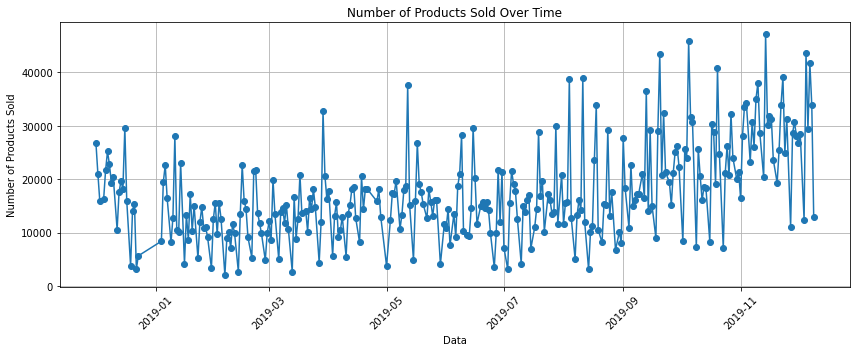

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Date'])
daily_sales = df.groupby(df['Date'].dt.date)['Quantity'].sum()

plt.figure(figsize=(12, 5))
plt.plot(daily_sales.index, daily_sales.values, marker='o', linestyle='-')
plt.title('Number of Products Sold Over Time')
plt.xlabel('Data')
plt.ylabel('Number of Products Sold')
plt.grid(True)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [14]:
grouped = df.groupby('CustomerNo')

In [15]:
df['total_revenue'] = df['Quantity']*df['Price']
df = df[df['Quantity'] >0]

In [16]:
max_date = df['Date'].max()
df2 = df.groupby('CustomerNo').agg({'Date':lambda x : (max_date-x.min()).days,
                                   'TransactionNo': lambda x: len(x),
                                    'Quantity': lambda x: x.sum(),
                                   'total_revenue': lambda x: x.sum()})
df2

,Date,TransactionNo,Quantity,total_revenue
CustomerNo,,,,
12004.0,227,56,104,1509.60
12006.0,218,1,2,24.76
12008.0,276,203,421,5689.57
12013.0,359,1,3,69.96
12024.0,176,5,14,149.52
...,...,...,...,...
18280.0,277,10,45,623.26
18281.0,180,7,54,576.58
18282.0,126,12,103,1044.86


In [17]:
df2.rename(columns={'Date': 'Recency',
                    'TransactionNo': 'Frequency',
                    'total_revenue': 'Monetary'}, inplace=True)

C:\Users\chceg\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\chceg\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\chceg\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

Text(0.5, 0, 'Monetart Value')

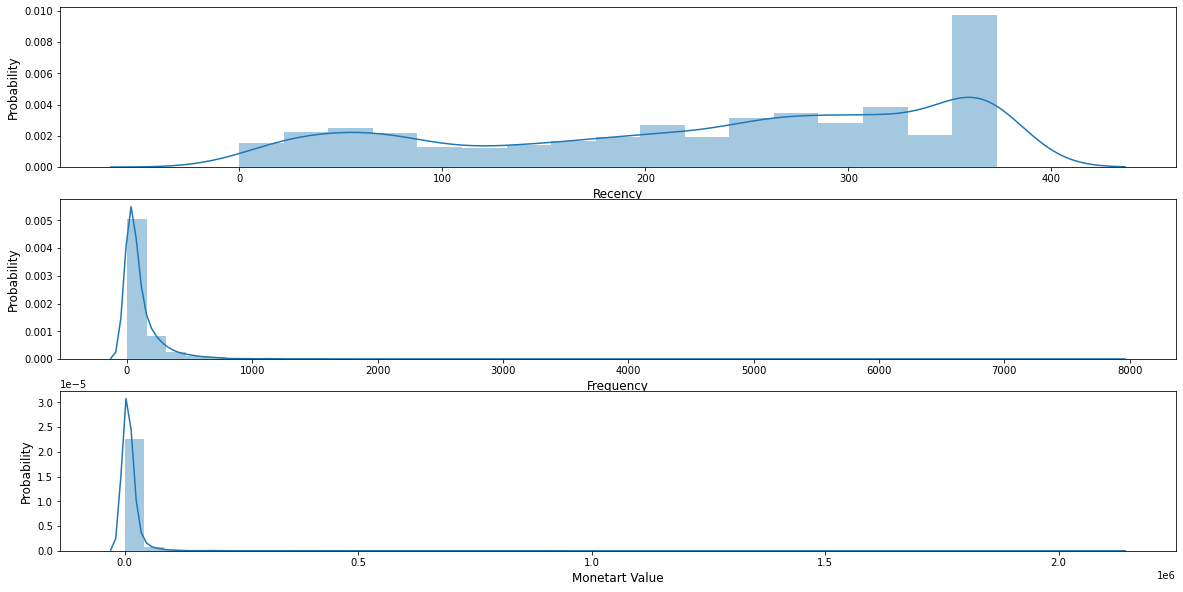

In [18]:
plt.figure(figsize=(20,10))
plt.subplot(3,1,1);
sns.distplot(df2['Recency'])
plt.ylabel('Probability', fontsize =12)
plt.xlabel('Recency', fontsize =12)

plt.subplot(3,1,2);
sns.distplot(df2['Frequency'])
plt.ylabel('Probability', fontsize =12)
plt.xlabel('Frequency', fontsize =12)
plt.subplot(3,1,3);
sns.distplot(df2['Monetary'])
plt.ylabel('Probability', fontsize =12)
plt.xlabel('Monetart Value', fontsize =12)

In [19]:
from sklearn.preprocessing import StandardScaler

# Standarization RFM
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(df2[['Recency', 'Frequency', 'Monetary']])


In [36]:
from sklearn.cluster import KMeans

# Choose umber of clusters (np. k=5)
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(rfm_scaled)

df2['Cluster'] = kmeans.labels_
cluster_labels = kmeans.labels_




C:\Users\chceg\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=19.
  warnings.warn(


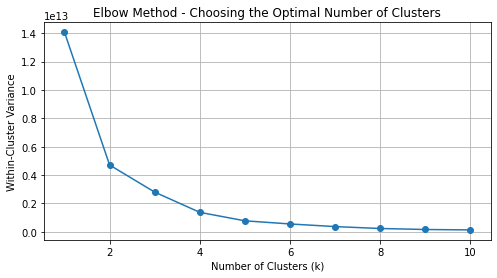

In [37]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


k_values = range(1, 11)  
inertia_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df2)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Variance')
plt.title('Elbow Method - Choosing the Optimal Number of Clusters')
plt.grid(True)
plt.show()


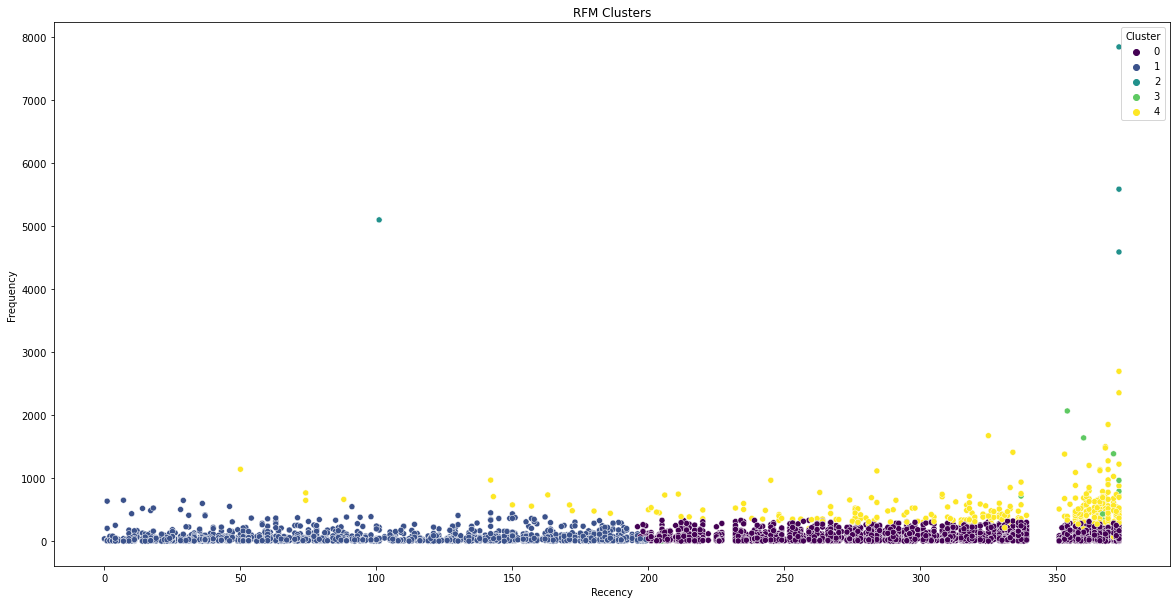

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))

sns.scatterplot(data=df2, x='Recency', y='Frequency', hue='Cluster', palette='viridis')
plt.title('RFM Clusters')
plt.show()


In [39]:
import numpy as np

cluster_means = []
for cluster_id in range(k):
    cluster_points = df2[cluster_labels == cluster_id]
    cluster_mean = np.mean(cluster_points, axis=0)
    cluster_means.append(cluster_mean)

In [40]:
import pandas as pd

# Let's assume 'df2' is a DataFrame containing your data, and 'Cluster' is the column with cluster labels

# Calculating the number of users in each cluster
cluster_sizes = df2.groupby('Cluster').size().reset_index(name='Number of Users')

# Grouping data by clusters and calculating the means
cluster_means = df2.groupby('Cluster').mean()

# Merging the number of users into the 'cluster_means' DataFrame
cluster_summary = pd.merge(cluster_means, cluster_sizes, on='Cluster')

# The resulting 'cluster_summary' DataFrame contains the means and the number of users for each cluster
print(cluster_summary)


   Cluster     Recency    Frequency      Quantity       Monetary  \
0        0  301.115915    81.049944    778.794633    8905.092124   
1        1   94.427964    57.901520    458.545897    5051.194790   
2        2  305.000000  5773.000000  36320.250000  404790.825000   
3        3  344.545455   781.909091  78088.181818  889918.302727   
4        4  330.024000   488.976000   4649.133333   51616.133627   

   Number of Users  
0             2683  
1             1645  
2                4  
3               11  
4              375  


In [41]:
cluster_summary

,Cluster,Recency,Frequency,Quantity,Monetary,Number of Users
0,0,301.115915,81.049944,778.794633,8905.092124,2683
1,1,94.427964,57.901520,458.545897,5051.194790,1645
2,2,305.000000,5773.000000,36320.250000,404790.825000,4
3,3,344.545455,781.909091,78088.181818,889918.302727,11
4,4,330.024000,488.976000,4649.133333,51616.133627,375


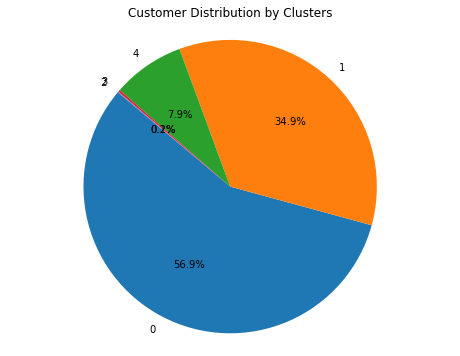

In [42]:
cluster_counts = df2['Cluster'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Customer Distribution by Clusters')
plt.axis('equal')
plt.show()


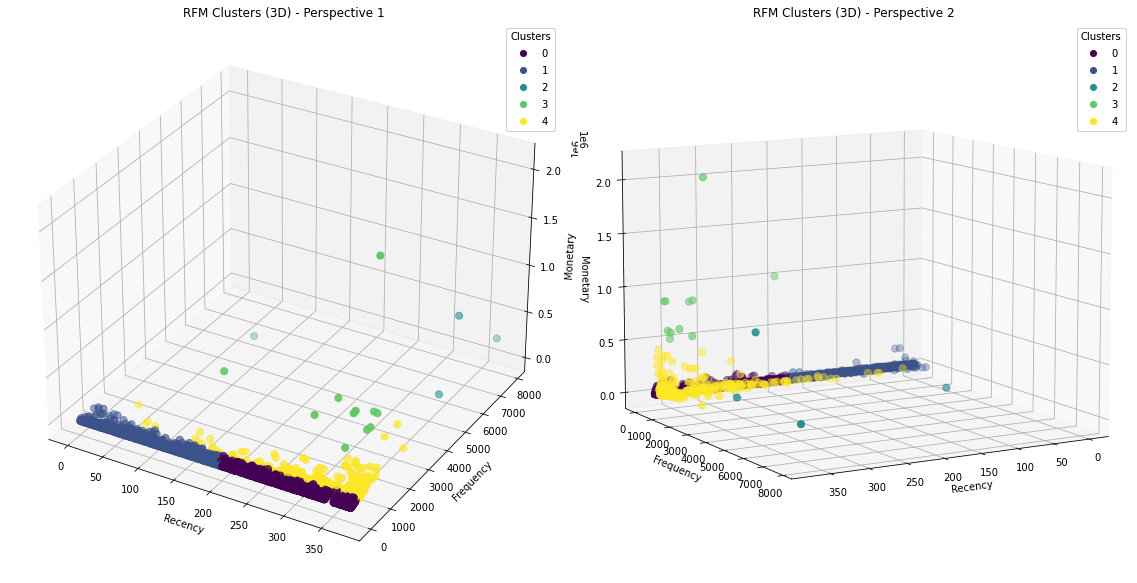

In [43]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.figure(figsize=(16, 8))

ax1 = plt.subplot(121, projection='3d')
scatter1 = ax1.scatter(df2['Recency'], df2['Frequency'], df2['Monetary'], c=df2['Cluster'], cmap='viridis', s=50)
ax1.set_xlabel('Recency')
ax1.set_ylabel('Frequency')
ax1.set_zlabel('Monetary')
legend1 = ax1.legend(*scatter1.legend_elements(), title='Clusters')
ax1.add_artist(legend1)
ax1.set_title('RFM Clusters (3D) - Perspective 1')

ax2 = plt.subplot(122, projection='3d')
scatter2 = ax2.scatter(df2['Recency'], df2['Frequency'], df2['Monetary'], c=df2['Cluster'], cmap='viridis', s=50)
ax2.set_xlabel('Recency')
ax2.set_ylabel('Frequency')
ax2.set_zlabel('Monetary')
legend2 = ax2.legend(*scatter2.legend_elements(), title='Clusters')
ax2.add_artist(legend2)
ax2.view_init(elev=10, azim=60)  # Inna perspektywa
ax2.set_title('RFM Clusters (3D) - Perspective 2')

# Wyświetlenie obu wykresów
plt.tight_layout()
plt.show()
